In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  

import torch
import torchvision
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn

import shutil
import os
import cv2 

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## The Model :

In [3]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

network = model_ft.to(device)
#print(network)

In [52]:
path_to_model = './model_res18_939.pt'
network.load_state_dict(torch.load(path_to_model, map_location={'cuda:0': 'cpu'}))

<All keys matched successfully>

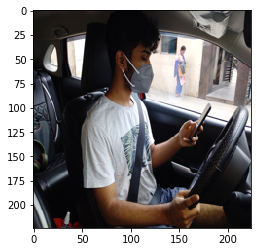

In [53]:
img=Image.open('images/dummy_class/2.jpg')
img = img.resize((224,224))
rotated_img = img.rotate(180)
plt.imshow(rotated_img)

In [54]:
transformations_n = transforms.Compose([
                                #transforms.ToPILImage(),
                                transforms.Resize((224,224), interpolation=2),
                                transforms.RandomHorizontalFlip(p=1),
                                transforms.RandomVerticalFlip(p=1),
                                transforms.ToTensor(),
                                ])

r_data = torchvision.datasets.ImageFolder(root='images/', transform=transformations_n)
print(len(r_data))

test_loader = torch.utils.data.DataLoader(
     r_data
    ,batch_size=1
    ,shuffle=True
)

10


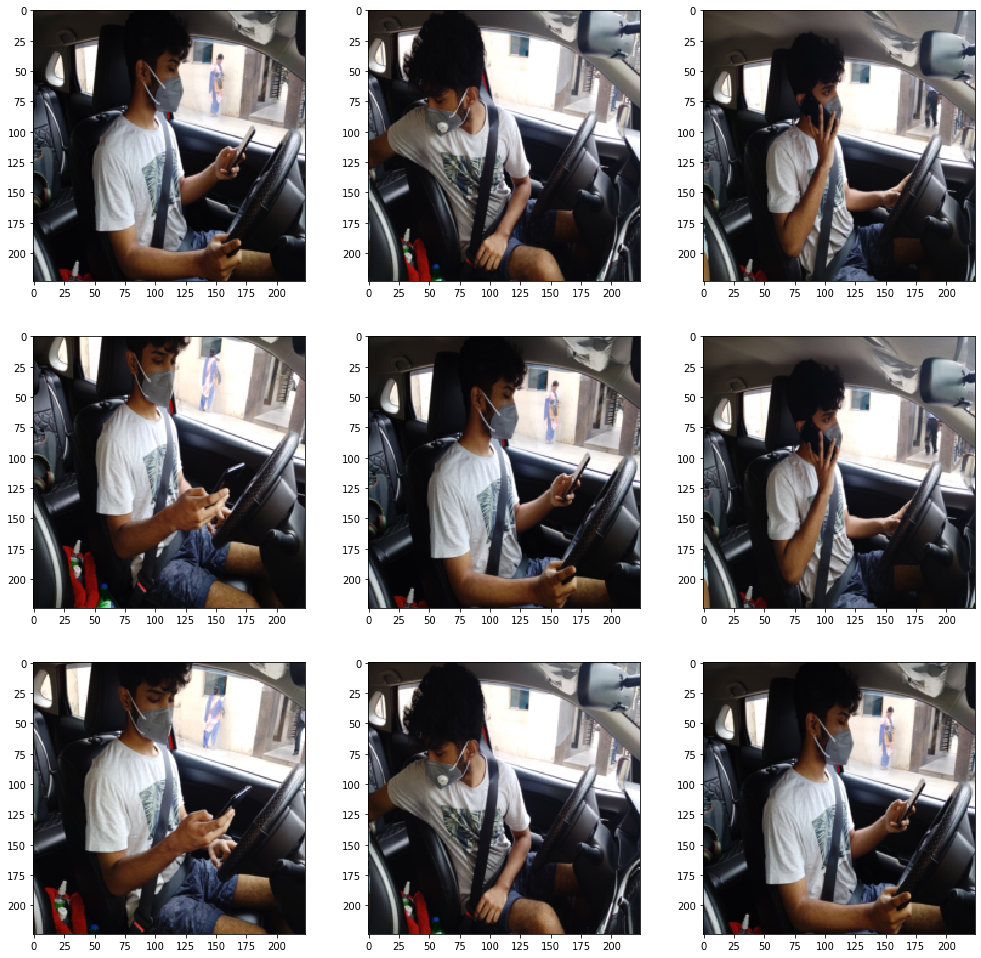

In [55]:
fig, axs = plt.subplots(3, 3, figsize=(17,17))

for i in range(3):
    for j in range(3):
        for image, dummy_label in (test_loader):
            x=np.transpose(image[0], (1, 2, 0))  #(224x224x3)
            axs[j,i].imshow(x, interpolation='none')
            break
            
plt.show()

In [56]:
class_list = ['safe', 'text-R', 'talk on phone-R', 'text-L', 'talk on phone-L', 'radio', 'drink'
, 'reach behind', 'hair/make-up', 'talk to passenger']

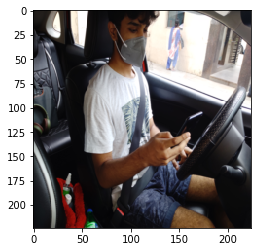

Predicted class: text-R


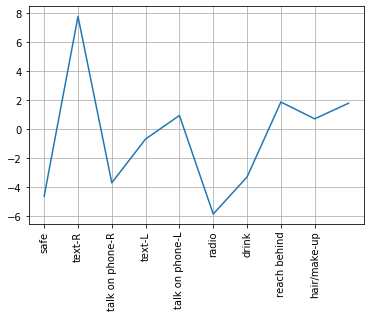

In [68]:
for image, lab in (test_loader):
    
    image=image.cpu()
    x=np.transpose(image[0], (1, 2, 0))  
    plt.imshow(x, interpolation='none')
    plt.show()

    with torch.no_grad():

            network.eval()
            images = image.to(device)
            lab=network(image[0].unsqueeze(0))
            lab = lab.cpu()
            #print(lab[0])
            max_index = np.argmax(lab[0]) 
            predicted_label = class_list[max_index]
            print('Predicted class:', predicted_label)
            break

plt.plot(lab[0])
plt.xticks([i for i in range(9)], class_list, rotation='vertical')
plt.grid()
plt.show()

In [96]:
def video_to_frames(video_path, save_folder_path, size = (256,256)):
    frames_paths = []
    try:
        os.mkdir(save_folder_path)

    except:
        shutil.rmtree(save_folder_path)
        os.mkdir(save_folder_path)

        
    vidObj = cv2.VideoCapture(video_path)   
    success = 1
    count = 0
    while success: 
        success, image = vidObj.read() 
        fmt_name = save_folder_path + "/" + str(count)+ ".jpg"
        try:     
            image_resized = cv2.resize(image, size)
            cv2.imwrite(fmt_name, image_resized)
            frames_paths.append(fmt_name)
            count += 1
        except:
            pass 
    return np.array(frames_paths)

In [97]:
target_path = "./V_1.mp4"
frames_paths = video_to_frames(
                                video_path = target_path,
                                save_folder_path = "frames"
                               )
frames_paths = frames_paths[1:-1]
print("after removing bad frames in the beginning and the end : ", len(frames_paths))

after removing bad frames in the beginning and the end :  661


In [119]:
#crop all images, use imagefolder, simple
transformations_n = transforms.Compose([
                                #transforms.ToPILImage(),
                                transforms.Resize((224,224), interpolation=2),
                                transforms.RandomVerticalFlip(p=1.0),
                                transforms.RandomHorizontalFlip(p=0.0),
                                transforms.ToTensor()
                                ])

r_data_2 = torchvision.datasets.ImageFolder(root='images_2/', transform=transformations_n)
print(len(r_data_2))


test_loader_4 = torch.utils.data.DataLoader(
     r_data_2
    ,batch_size=1
    ,shuffle=True
)

4


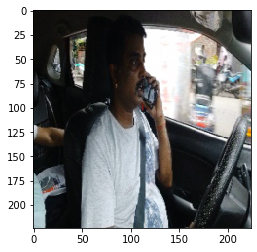

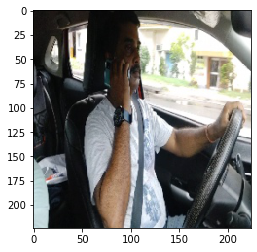

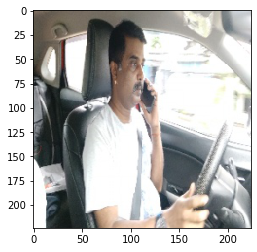

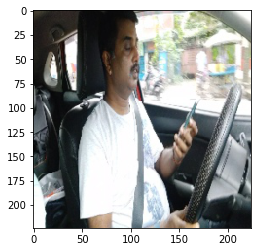

In [120]:
for image, dummy_label in (test_loader_4):
    x=np.transpose(image[0], (1, 2, 0))  #(224x224x3)
    plt.imshow(x, interpolation='none')
    plt.show()

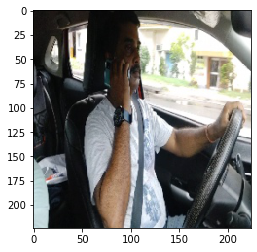

Predicted class: hair/make-up


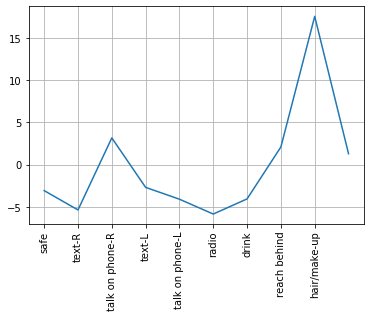

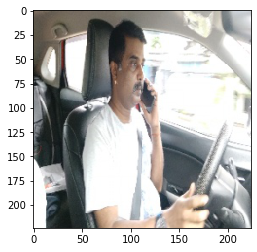

Predicted class: talk on phone-R


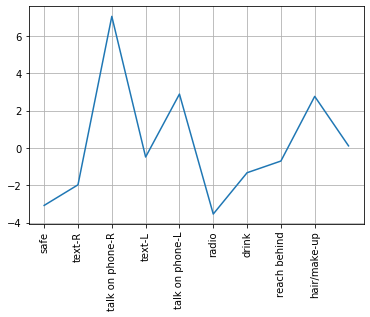

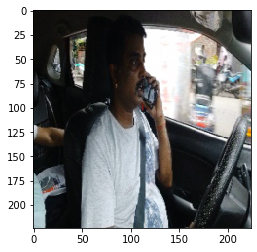

Predicted class: hair/make-up


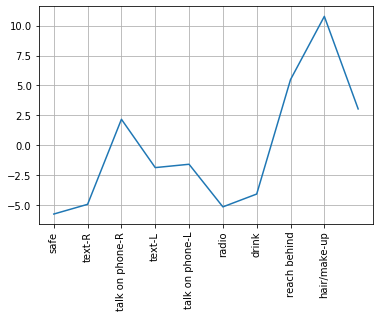

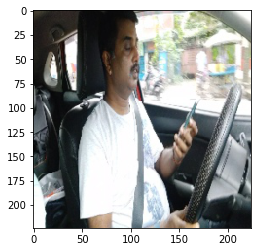

Predicted class: text-R


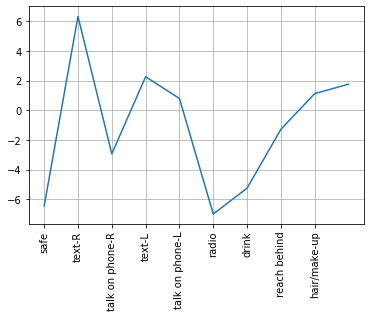

In [129]:
for image, lab in (test_loader_4):
    
    image=image.cpu()
    x=np.transpose(image[0], (1, 2, 0))  
    plt.imshow(x, interpolation='none')
    plt.show()

    with torch.no_grad():

            network.eval()
            images = image.to(device)
            lab=network(image[0].unsqueeze(0))
            lab = lab.cpu()
            #print(lab[0])
            max_index = np.argmax(lab[0]) 
            predicted_label = class_list[max_index]
            print('Predicted class:', predicted_label)
            

            plt.plot(lab[0])
            plt.xticks([i for i in range(9)], class_list, rotation='vertical')
            plt.grid()
            plt.show()